In [22]:
from tensorflow.keras.models import load_model

model = load_model('gru_model/model_rnn_GRU.120_Dense.5010_LSTMKernelInit.VarianceScaling_DenseKernelInit.lecun_uniformKRl1.0_KRl2.0_recAct.sigmoid_weights.h5')

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15, 6)]           0         
                                                                 
 gru (GRU)                   (None, 120)               46080     
                                                                 
 dense_0 (Dense)             (None, 50)                6050      
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                                 
 output_softmax (Dense)      (None, 3)                 33        
                                                                 
Total params: 52,673
Trainable params: 52,673
Non-trainable params: 0
_________________________________________________________________


In [16]:
import hls4ml
import os
os.environ['PATH'] = '/opt/Xilinx/Vivado/2019.2/bin:' + os.environ['PATH']

In [17]:
config = hls4ml.utils.config_from_keras_model(model, granularity='model', default_precision='ap_fixed<18,8>')
config['Model']['ReuseFactor'] = 1
config['Model']['Strategy']='Resource'
print("-----------------------------------")
plotting.print_dict(config)
print("-----------------------------------")


hls_model = hls4ml.converters.convert_from_keras_model(model,
                                                       hls_config=config,
                                                       output_dir='hls/ftag_gru_hls4ml_prj',
                                                       part='xcu250-figd2104-2L-e'
                                                       )

Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 15, 6]], output shape: [None, 15, 6]
Layer name: gru, layer type: GRU, input shapes: [[None, 15, 6]], output shape: [None, 120]
Layer name: dense_0, layer type: Dense, input shapes: [[None, 120]], output shape: [None, 50]
Layer name: dense_1, layer type: Dense, input shapes: [[None, 50]], output shape: [None, 10]
Layer name: output_softmax, layer type: Dense, input shapes: [[None, 10]], output shape: [None, 3]
Interpreting Model
Topology:
Layer name: input_1, layer type: InputLayer, input shapes: [[None, 15, 6]], output shape: [None, 15, 6]
Layer name: gru, layer type: GRU, input shapes: [[None, 15, 6]], output shape: [None, 120]
Layer name: dense_0, layer type: Dense, input shapes: [[None, 120]], output shape: [None, 50]
Layer name: dense_1, layer type: Dense, input shapes: [[None, 50]], output shape: [None, 10]
Layer name: output_softmax, layer type: Dense, input shapes: [[None, 10]], outp

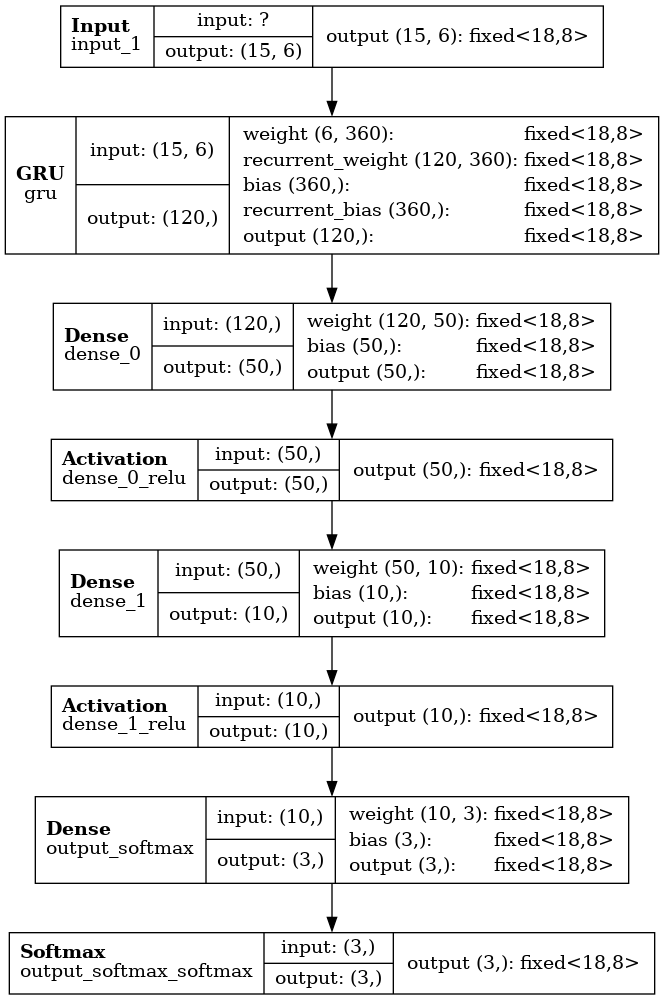

In [20]:
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)

In [18]:
hls_model.compile()

Writing HLS project
Done


In [19]:
hls_model.build(csim=False, synth=True, vsynth=True)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2019.2 (64-bit)
  **** SW Build 2708876 on Wed Nov  6 21:39:14 MST 2019
  **** IP Build 2700528 on Thu Nov  7 00:09:20 MST 2019
    ** Copyright 1986-2019 Xilinx, Inc. All Rights Reserved.

source /tools/Xilinx/Vivado/2019.2/scripts/vivado_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/tools/Xilinx/Vivado/2019.2/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'jiuyal2' on host 'Duo16.' (Linux_x86_64 version 5.15.146.1-microsoft-standard-WSL2) on Wed Feb 28 00:35:51 PST 2024
INFO: [HLS 200-10] On os Ubuntu 18.04.6 LTS
INFO: [HLS 200-10] In directory '/home/jiuyal2/HLS4ML_VS_MANUAL/documents/Benchmarks/RNN/ftag/hls/ftag_gru_hls4ml_prj'
Sourcing Tcl script 'build_prj.tcl'
INFO: [HLS 200-10] Opening project '/home/jiuyal2/HLS4ML_VS_MANUAL/documents/Benchmarks/RNN/ftag/hls/ftag_gru_hls4ml_prj/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 200-10] 

{}